In [43]:
import glob
import os 
os.chdir("plankton_siamese")
import testing as t
from keras.models import load_model
glob.glob("test/*")

### Testing triplet_generator ###
0 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
1 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
2 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
3 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)


Using TensorFlow backend.


['test/Brachyura', 'test/Bivalvia__Mollusca', 'test/Annelida']

In [24]:
image_paths = []
image_classes = glob.glob("test/*")
for image_class in image_classes:
  image_paths.extend(glob.glob(image_class + '/*.jpg'))

In [25]:
len(image_paths)

300

In [44]:
model = load_model("models/epoch_1.model")
image_vectors = t.get_vectors(model, tdir = "test/")
len(image_vectors)

/home/florianmuthreich/.local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


3

In [30]:
import numpy as np
from PIL import Image
from generators import paste
img = np.array(Image.open(image_paths[1]))/256
vec = model.predict(np.expand_dims(paste(img),axis =0))
vec.shape

(1, 64)

In [37]:
from testing import centroid
from testing import knn_test
#centroid(image_vectors['Annelida'])
knn_test(model, "validate", "test", k=5)


{'Annelida': {'Annelida': 99, 'Bivalvia__Mollusca': 0, 'Brachyura': 1},
 'Bivalvia__Mollusca': {'Annelida': 1,
  'Bivalvia__Mollusca': 99,
  'Brachyura': 0},
 'Brachyura': {'Annelida': 1, 'Bivalvia__Mollusca': 0, 'Brachyura': 99}}

In [45]:
vecs = np.zeros((1,64))
y_truth = []
conv_dict = {}
keys = list(image_vectors.keys())
for i in range(len(keys)):
    conv_dict[keys[i]] = i
for c in image_vectors:
    print(c)
    vecs = np.append(vecs,np.array(image_vectors[c]).reshape(100,64), axis = 0)
    y_truth.append([c]*100)
vecs = np.delete(vecs,0,0)
y_truth = [item for sublist in y_truth for item in sublist]



Brachyura
Annelida
Bivalvia__Mollusca


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

In [47]:
pca_5 = PCA(n_components=5)
pca_result_5 = pca_5.fit_transform(vecs)
print('Cumulative explained variation for 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))
print(np.shape(pca_result_5))

    
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(pca_result_5)

Cumulative explained variation for 5 principal components: 0.9987155621976924
(300, 5)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.034451
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.678051
[t-SNE] KL divergence after 3000 iterations: 0.140168


In [48]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

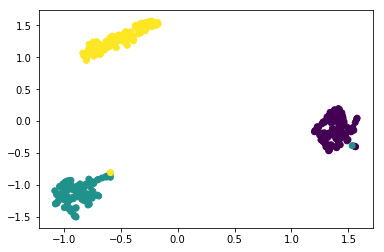

In [80]:
plt.scatter(tsne_result_scaled[:,0], tsne_result_scaled[:,1], c = [conv_dict[i] for i in y_truth])

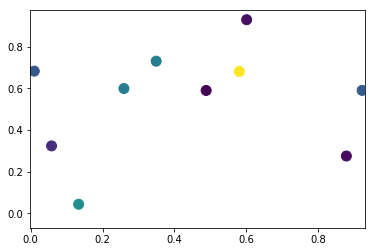

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    xy_data = np.random.random((numframes, numpoints, 2))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat, xy_data))
    
    #plt.show()
    return(ani)

def update_plot(i, data, scat, xy):
    #scat.set_array(data[i])
    scat.set_offsets(xy[i])
    return scat,

ani = main()
HTML(ani.to_html5_video())

In [63]:
tsne_result_scaled[:,0], tsne_result_scaled[:,1]

(array([ 1.2587086 ,  1.4117845 ,  1.2663771 ,  1.3489628 ,  1.3077068 ,
         1.4754889 ,  1.5505301 ,  1.3958868 ,  1.4028676 ,  1.3775985 ,
         1.4676203 ,  1.4962231 ,  1.4339105 ,  1.4149818 ,  1.3512309 ,
         1.3387775 ,  1.2955678 ,  1.4082103 ,  1.3972865 ,  1.5098802 ,
         1.355919  ,  1.2232348 ,  1.4529954 ,  1.3845156 ,  1.4425439 ,
         1.2266133 ,  1.3330334 ,  1.3179839 ,  1.3028369 ,  1.3230727 ,
         1.4274441 ,  1.4821815 ,  1.2919239 ,  1.2915248 ,  1.3265467 ,
         1.3603369 ,  1.416745  ,  1.3946407 ,  1.4583732 ,  1.2944095 ,
         1.4280818 ,  1.2868947 ,  1.4015253 , -0.9000094 ,  1.5712507 ,
         1.2782859 ,  1.5591267 ,  1.2785454 ,  1.4864588 ,  1.4637564 ,
         1.4304867 ,  1.5626931 ,  1.328851  ,  1.4240911 ,  1.3365743 ,
         1.3329923 ,  1.3670455 ,  1.4407823 ,  1.4341679 ,  1.5238885 ,
         1.3462955 ,  1.4210289 ,  1.3602833 ,  1.4911045 ,  1.3548458 ,
         1.2371193 ,  1.4265449 ,  1.4088643 ,  1.3

In [56]:
zip(tsne_result_scaled[:,0], tsne_result_scaled[:,1])

In [75]:
tmp = tsne_result_scaled[:,0:2].reshape(1,300,2)
res = np.append(tmp, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)
res = np.append(res, tmp+np.random.random((300,2))/100,0)


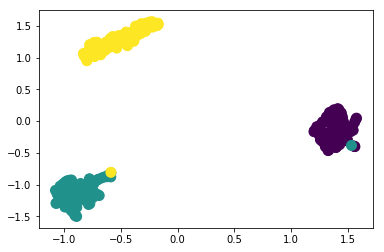

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main():
    numframes = 14
    numpoints = 10
    color_data = [conv_dict[i] for i in y_truth]
    xy_data = res

    fig = plt.figure()
    scat = plt.scatter(res[0,:,0], res[0,:,1], c=color_data, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(scat, xy_data))
    
    #plt.show()
    return(ani)

def update_plot(i, data, scat, xy):
    scat.set_offsets(xy[i])
    return scat,

ani = main()
HTML(ani.to_html5_video())

In [78]:
res[0,:,0]

array([ 1.2587086 ,  1.41178453,  1.26637709,  1.34896278,  1.30770683,
        1.4754889 ,  1.55053008,  1.39588678,  1.40286756,  1.37759852,
        1.46762025,  1.49622309,  1.43391049,  1.41498184,  1.35123086,
        1.33877754,  1.29556775,  1.40821028,  1.39728653,  1.50988019,
        1.355919  ,  1.22323477,  1.45299542,  1.38451564,  1.44254386,
        1.22661328,  1.33303344,  1.31798387,  1.30283689,  1.32307267,
        1.4274441 ,  1.48218155,  1.29192388,  1.29152477,  1.32654667,
        1.3603369 ,  1.41674495,  1.39464068,  1.45837319,  1.29440951,
        1.42808175,  1.28689468,  1.40152526, -0.90000939,  1.57125068,
        1.27828586,  1.55912673,  1.27854538,  1.48645878,  1.46375644,
        1.43048668,  1.56269312,  1.32885098,  1.4240911 ,  1.33657432,
        1.33299232,  1.36704552,  1.44078231,  1.43416786,  1.52388847,
        1.34629548,  1.42102885,  1.36028326,  1.49110448,  1.35484576,
        1.23711932,  1.4265449 ,  1.40886426,  1.38732493,  1.31